# Exploratory Data Analysis (EDA), Visualization, and Splitting into Train/Test Sets

In [17]:
import pandas as pd
import numpy as np

In [18]:
# load the dataset
df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

### Data Cleaning

In [19]:
# remove all rows with missing values
df.dropna(inplace=True) 

# remove all duplicate values based on track name and artist name
df.drop_duplicates(subset=['track_name', 'artists'], inplace=True)

### Genre Mapping

In [20]:
genres = ['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
    'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
    'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
    'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
    'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
    'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
    'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
    'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
    'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
    'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
    'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
    'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
    'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
    'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
    'samba' 'sertanejo' 'show-tunes' 'singer-songwriter' 'ska' 'sleep'
    'songwriter' 'soul' 'spanish' 'study' 'swedish' 'synth-pop' 'tango'
    'techno' 'trance' 'trip-hop' 'turkish' 'world-music'
 ]

genre_mapping = {
    "rock_alt_metal": [
        "alt-rock", "alternative", "black-metal", "death-metal", "emo", "goth",
        "grindcore", "grunge", "hard-rock", "hardcore", "heavy-metal", "metal",
        "metalcore", "psych-rock", "punk-rock", "punk", "rock", "rock-n-roll", "hardstyle", "j-rock", "rockabilly"
    ],
    "pop_indie": [
        "pop", "power-pop", "pop-film", "indie", "indie-pop", "j-pop", "k-pop",
        "cantopop", "mandopop", "synth-pop"
    ],
    "electronic_dance": [
        "edm", "dance", "electro", "electronic", "trance", "techno",
        "detroit-techno", "chicago-house", "progressive-house", "deep-house",
        "house", "minimal-techno", "dubstep", "drum-and-bass", "breakbeat",
        "dub", "idm", "disco", "garage", "groove"
    ],
    "hiphop_rnb": [
        "hip-hop", "r-n-b", "soul", "funk"
    ],
    "jazz_classical": [
        "jazz", "blues", "classical", "piano"
    ],
    "country_folk": [
        "country", "folk", "bluegrass", "honky-tonk", "singer-songwriter",
        "songwriter", "acoustic"
    ],
    "latin_world": [
        "latin", "latino", "afrobeat", "brazil", "mpb", "samba", "salsa", "tango",
        "pagode", "forro", "sertanejo", "reggaeton", "indian", "iranian",
        "turkish", "french", "german", "british", "swedish", "malay", "world-music"
    ],
    "reggae": [
        "reggae", "dancehall"
    ],
    "ambient_chill": [
        "ambient", "chill", "new-age", "trip-hop"
    ],
    "thematic": [
        "anime", "children", "comedy", "club", "disney", "gospel", "guitar",
        "happy", "industrial", "j-dance", "j-idol", "kids", "opera", "party",
        "romance", "sad", "show-tunes", "ska", "sleep", "spanish", "study"
    ]
}


flattened_mapping = {genre: category for category, subgenres in genre_mapping.items() for genre in subgenres}

df['track_genre'] = df['track_genre'].apply(lambda x: flattened_mapping[x])



In [23]:
print(len(df['track_genre'].unique()))

10


### Distributions of Modes for Each Genre

track_genre
ambient_chill       0.594100
country_folk        0.846171
electronic_dance    0.543395
hiphop_rnb          0.543807
jazz_classical      0.713617
latin_world         0.620362
pop_indie           0.671976
reggae              0.517518
rock_alt_metal      0.619785
thematic            0.667246
Name: mode, dtype: float64


<Axes: xlabel='track_genre'>

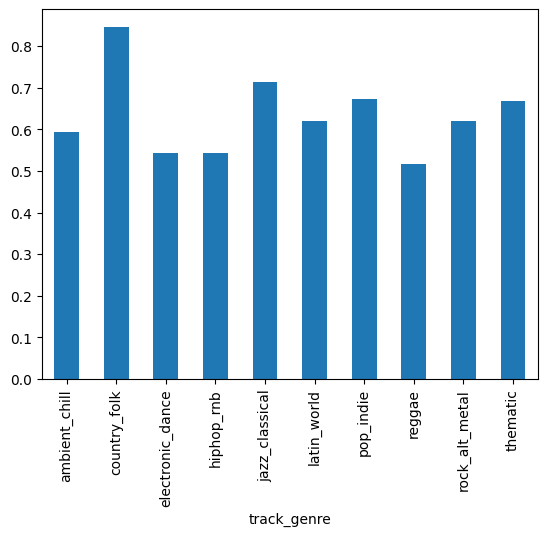

In [24]:
# get the number of genres in the dataset

# Group the dataset by genre, and get the percentage of tracks that has Mode value of 1
print(df.groupby('track_genre')['mode'].mean())

# visualize the percentage of modes of each genre, by plotting a histogram of the track genres
df.groupby('track_genre')['mode'].mean().plot(kind='bar')

### Splitting Dataset into Train and Test

In [25]:
def split_data(data, split_percentage):
    # Split the data into train, validation and test sets
    return np.split(data, [int(split_percentage[0]*len(data))])

In [26]:
split_percentage = [0.8, 0.2]

# shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)
train, test = split_data(df, split_percentage)
print(train.shape, test.shape)

(65074, 21) (16269, 21)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
